<a href="https://colab.research.google.com/github/andrew-wairegi-school/core-week4-IP/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2021_11_Andrew_Wairegi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib Electric Car-sharing

In [ ]:
# Github link: https://github.com/andrew-wairegi-school/core-week4-IP

**Data definitions**:

*   Postal code - code for station
*   date - date of record
*   n_daily_data_points - points from borrowing cars
*   dayOfWeek - day of week for that record
*   day_type - type of day, weekday / weekend
*   BlueCars_taken_sum - Sum of bluecars borrowed
*   BlueCars_returned_sum - Sum of bluecars returned
*   Utilib_taken_sum - Sum of standard Utilib cars taken
*   Utilib_returned_sum - Sum of standard Utilib cars returned
*   Utilib_14_taken_sum - Sum of Utilib 1.4 cars taken
*   Utilib_14_returned_sum - Sum of Utilib 1.4 cars returned
*   Slots_freed_sum - charging docks free at end of day
*   Slots_taken_sum - charging docks full at end of day















## 1. Defining the question

### a) Specifying the question 

To determine if one postal code location has the same number of bluecars, as another location

### b) Defining the metric for success

If the postal location, is within the significance level of the other postal location. When the p-value has been calculated.

### c) Understanding the context

Bluecars are stationed in different places throughout the city of Paris. We want to use hypothesis testing. To see if there can be an interval between one location and another. In terms of bluecar borrowing amounts

### d) Experimental design

1. Viewing the data
2. Cleaning the data
3. Exploratory data analysis
4. Forming the Hypothesis question
5. Doing the hypothesis test

### e) Data relevance

The data was done in Paris, which is one of the most popular cities in France. With it being one of the most social cities in the world. It would make sense that car rentals would be popular there. So it is one of the best cities to get electrical car use data from in the world. Especially since it is very popular for tourists in the world. It is also done in 2018, which is a very recent year from where we are now, 2021.

## 2. Reading the Data

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the data
df = pd.read_csv("https://drive.google.com/uc?id=1glFSy3GggPzcaWGRbaL5ON5cjtsPF6OD")
df.head(2)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22


## 3. Checking the dataset

In [ ]:
# Checking the shape
df.shape

(16085, 13)

In [ ]:
# Viewing the head
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Viewing the tail
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## 4. External data source validation

The data source looks valid. It is from a US archive source link. I believe it is authentic data. As I have seen another data source with similar data, in the past.

## 5. Cleaning the dataset

In [ ]:
# 1. Drop unused columns
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
df.drop(["n_daily_data_points", "Utilib_taken_sum", "Utilib_returned_sum", "Utilib_14_taken_sum", "Utilib_14_returned_sum"], axis = 1, inplace = True)
df.head(2)

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,0,weekday,110,103,22,20
1,75001,1/2/2018,1,weekday,98,94,23,22


In [ ]:
# 2. Convert date column to datetime data type
df["date"] = pd.to_datetime(df["date"])

In [ ]:
# Checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Postal code            16085 non-null  int64         
 1   date                   16085 non-null  datetime64[ns]
 2   dayOfWeek              16085 non-null  int64         
 3   day_type               16085 non-null  object        
 4   BlueCars_taken_sum     16085 non-null  int64         
 5   BlueCars_returned_sum  16085 non-null  int64         
 6   Slots_freed_sum        16085 non-null  int64         
 7   Slots_taken_sum        16085 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1005.4+ KB


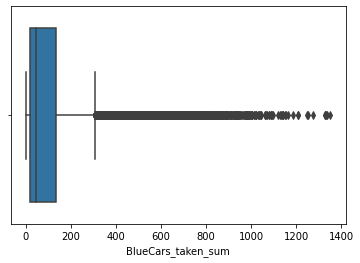

In [ ]:
# 3. Check for outliers
sns.boxplot(data = df, x = "BlueCars_taken_sum")

In [ ]:
# There are too many outliers for them to be called outliers.
# It probably just meant that there were unpopular days throughout the year.
# And this is why they had relatively low values for the average

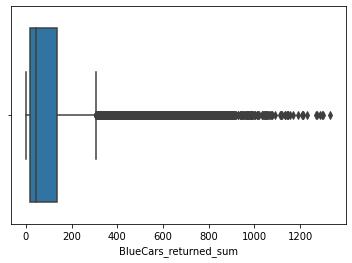

In [ ]:
sns.boxplot(data = df, x = "BlueCars_returned_sum")

In [ ]:
# Again there are very many outliers.
# However, the mean seems to be lower than the blue cars taken.
# Which makes sense, since most people are taking and might return on different days

In [ ]:
# 4. Remove missing values
df.isnull().sum()

Postal code              0
date                     0
dayOfWeek                0
day_type                 0
BlueCars_taken_sum       0
BlueCars_returned_sum    0
Slots_freed_sum          0
Slots_taken_sum          0
dtype: int64

In [ ]:
# No missing values

In [ ]:
# 5. Remove duplicates
df.duplicated().sum()

0

In [ ]:
# No duplicates

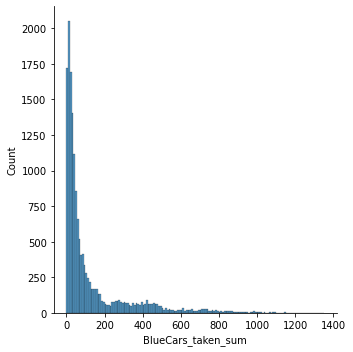

In [ ]:
# 6. Look for anomalies
sns.displot(data = df, x = "BlueCars_taken_sum")

In [ ]:
# According to the boxplot this is normal.
# So it is normal

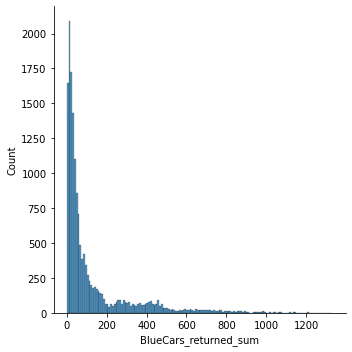

In [ ]:
sns.displot(data = df, x = "BlueCars_returned_sum")

In [ ]:
# This is also normal, it should have a slightly
# similar distribution to the cars taken

In [ ]:
# 7. Normalize column names and values
# Column names
df.columns

Index(['Postal code', 'date', 'dayOfWeek', 'day_type', 'BlueCars_taken_sum',
       'BlueCars_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("_", " ")
df.columns = df.columns.str.strip()
df.columns

Index(['postal code', 'date', 'dayofweek', 'day type', 'bluecars taken sum',
       'bluecars returned sum', 'slots freed sum', 'slots taken sum'],
      dtype='object')

In [ ]:
# Column values

In [ ]:
df["day type"].unique()

array(['weekday', 'weekend'], dtype=object)

In [ ]:
# no capital letters and no spaces

In [ ]:
# 8. Rename columns
df.rename(columns = {"bluecars taken sum": "bluecars borrowed", "bluecars returned sum": "bluecars returned"}, inplace = True)
df.columns

Index(['postal code', 'date', 'dayofweek', 'day type', 'bluecars borrowed',
       'bluecars returned', 'slots freed sum', 'slots taken sum'],
      dtype='object')

## 6. Data preparation

In [ ]:
# Create month number column
df["month number"] = df["date"].dt.month

In [ ]:
df.head(2)

,postal code,date,dayofweek,day type,bluecars borrowed,bluecars returned,slots freed sum,slots taken sum,month number
0,75001,2018-01-01,0,weekday,110,103,22,20,1
1,75001,2018-01-02,1,weekday,98,94,23,22,1


## 7. Exploratory data analysis

### Univariate analysis

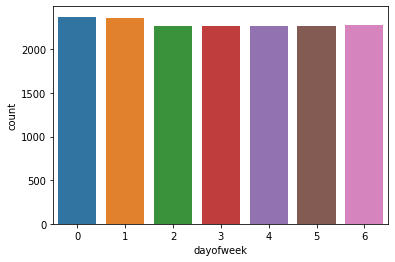

In [ ]:
sns.countplot(data = df, x = "dayofweek")

In [ ]:
# Note: monday is day 0, to sunday which is day 6

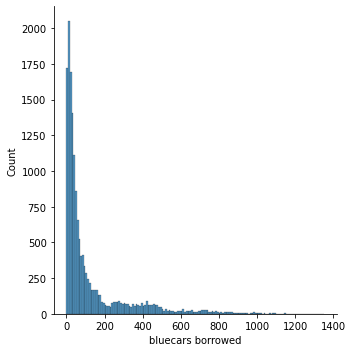

In [ ]:
sns.displot(data = df, x = "bluecars borrowed")

In [ ]:
df["bluecars borrowed"].mode()

0    12
dtype: int64

In [ ]:
# It seems on most days, 12 cars borrowed

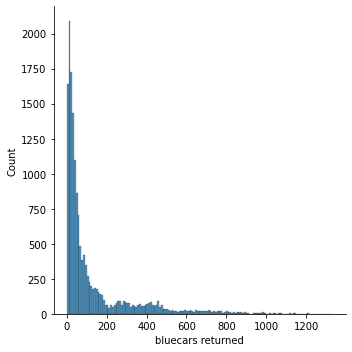

In [ ]:
sns.displot(data = df, x = "bluecars returned")

In [ ]:
df["bluecars returned"].mode()

0    13
dtype: int64

In [ ]:
# It seems here most cars are returned in batches of 11 - 15 bluecars.
# However, it is more thinly distributed.
# So that means it should be more evenly spread out throughout the batches.
# However they could have lost some cars

In [ ]:
# Checking if cars are lost
df["bluecars borrowed"].sum()

2025535

In [ ]:
df["bluecars returned"].sum()

2025306

In [ ]:
# Apparently more cars were borrowed than
# returned. This means that some were lost or borrowed.
# However, they probabaly followed up with them to return
# or pay for the car

In [ ]:
groups = df[["dayofweek", "bluecars borrowed", "bluecars returned"]].groupby("dayofweek").sum()
groups

,bluecars borrowed,bluecars returned
dayofweek,,
0,263893,264808
1,261940,260470
2,261849,260673
3,263207,262961
4,288546,286029
5,353934,351570
6,332166,338795


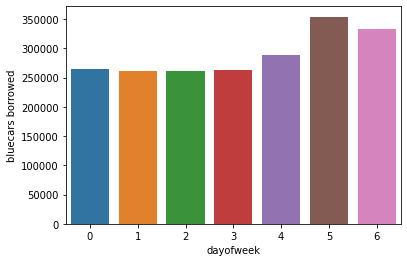

In [ ]:
sns.barplot(data = groups, x = groups.index, y = "bluecars borrowed")

In [ ]:
# It seems the bluecars were evenly distributed
# Throughout the days. In borrowing

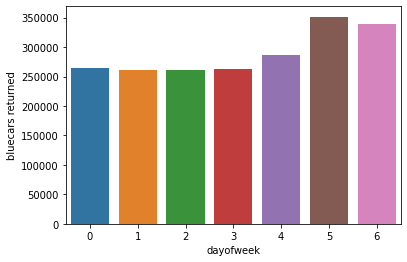

In [ ]:
sns.barplot(data = groups, x = groups.index, y = "bluecars returned")

In [ ]:
# It seems the distribution is still pretty much the same
# However remember, that they were returned in larger batches. Due to a
# high backload from other days. However it's still evenly distributed throughout
# the day

In [ ]:
df[["bluecars borrowed", "bluecars returned"]].describe()

,bluecars borrowed,bluecars returned
count,16085.000000,16085.000000
mean,125.926951,125.912714
std,185.426579,185.501535
min,0.000000,0.000000
25%,20.000000,20.000000
50%,46.000000,46.000000
75%,135.000000,135.000000
max,1352.000000,1332.000000


In [ ]:
# Looking at the statstics of the columns we are interested
# in. Mainly, the mean, min, max, and the quartiles for each column

### Bivariate analysis

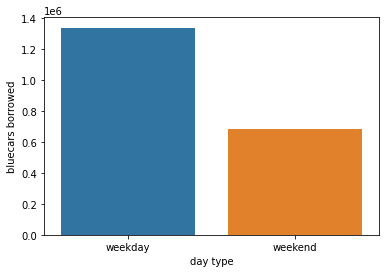

In [ ]:
group_day = df[["day type", "bluecars borrowed"]].groupby("day type").sum()
sns.barplot(data = group_day, y = "bluecars borrowed", x = group_day.index)

In [ ]:
# It seems more cars are taken during the weekday.
# So we can use that in our analysis. So that we get more data

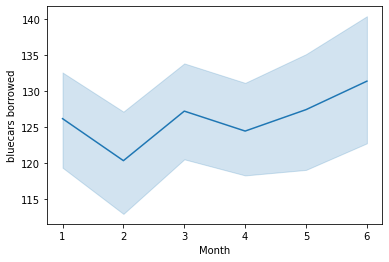

In [ ]:
sns.lineplot(x = df["date"].dt.month , y = df["bluecars borrowed"])
plt.xlabel("Month")
plt.show()

In [ ]:
# The cars burrowed seem to increase throughout the year.
# So they may increase throughout the whole year. Or they may stop
# after the middle of the year

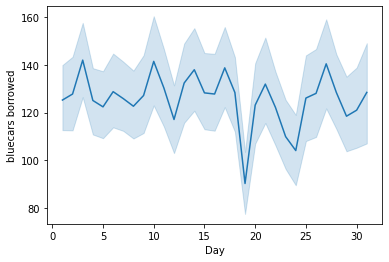

In [ ]:
sns.lineplot(x = df["date"].dt.day , y = df["bluecars borrowed"])
plt.xlabel("Day")
plt.show()

In [ ]:
# The cars borrowed seem to be constant throughout the
# year. However, they dip during the 19th day.
# However, this could be due to funds.

# Then they pick up again after that.

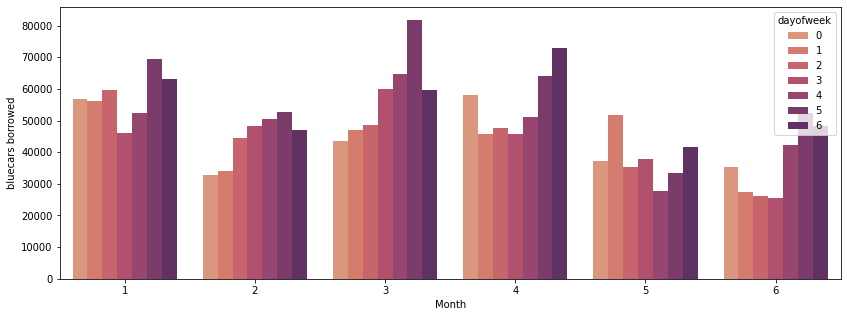

In [ ]:
plt.figure(figsize = (14, 5))
sns.barplot(x = df["date"].dt.month, y = df["bluecars borrowed"], estimator = np.sum, ci = None, hue = df["dayofweek"], palette = "flare")
plt.xlabel("Month")
plt.show()

In [ ]:
# Key: 0 = Monday, 1 = Tuesday, 2 = Wednesday, 3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday

In [ ]:
month_groupby = df[["postal code", "bluecars borrowed", "month number"]].groupby(["month number", "postal code"]).sum()
month_groupby.reset_index(inplace = True)
postal_code_monthly = (month_groupby[["postal code", "bluecars borrowed"]].groupby("postal code").mean()).reset_index()
postal_code_monthly

,postal code,bluecars borrowed
0,75001,3499.166667
1,75002,4523.833333
2,75003,6198.000000
3,75004,5242.333333
4,75005,7961.000000
...,...,...
99,94700,881.333333
100,94800,2081.000000
101,95100,623.833333
102,95870,396.333333


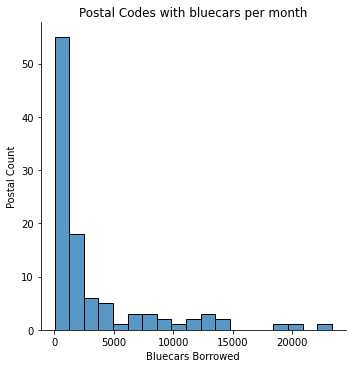

In [ ]:
sns.displot(data = postal_code_monthly, x = "bluecars borrowed")
plt.title("Postal Codes with bluecars per month")
plt.ylabel("Postal Count")
plt.xlabel("Bluecars Borrowed")
plt.show()

In [ ]:
# It seems the blue cars borrowed are mainly done between 0 - 7000
# for most of the postal codes. Then it drops down to 7000 - 14000 cars.
# For that postal code for the 6 months.

In [ ]:
id = postal_code_monthly["bluecars borrowed"].idxmax()
postal_code_monthly.iloc[id]

postal code          75015.000000
bluecars borrowed    23320.833333
Name: 14, dtype: float64

In [ ]:
id = postal_code_monthly["bluecars borrowed"].idxmin()
postal_code_monthly.iloc[id]

postal code          93390.000000
bluecars borrowed       50.833333
Name: 77, dtype: float64

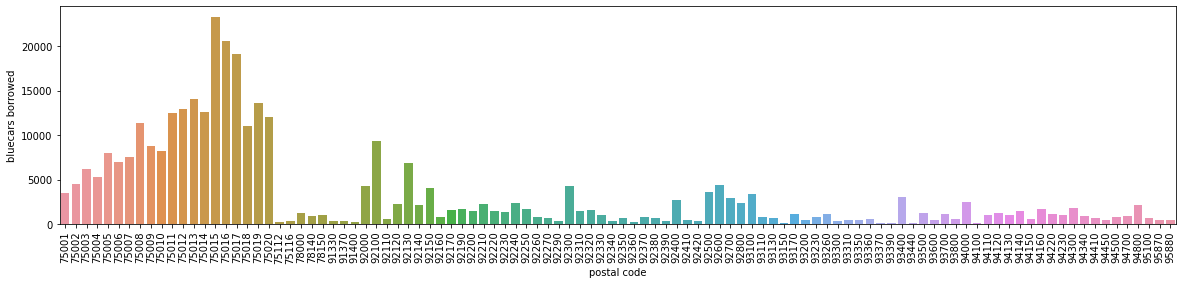

In [ ]:
plt.figure(figsize = (20, 4))
sns.barplot(data = postal_code_monthly, x = "postal code", y = "bluecars borrowed")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# It seems we have a max of blue cars, at a certain postal code
# Then it goes down after that. This means, these postal codes may be in a certain
# region. Where electric cars are popular. For example near town.

In [ ]:
postal_code_monthly[postal_code_monthly["postal code"] == 75017]

,postal code,bluecars borrowed
16,75017,19096.833333


## 8. Hypothesis test

Alternative Hypothesis: Can the number of bluecars in Postal code 75017
be in the same range as 75015 ?

Null Hypothesis: The number of bluecars in Postal code 75017
is different from the postal code 75015

Explanation: We can see that the number of cars in 75017, is far off to 75015. But could they be in the same area. Even though it has peaked out at 23300 bluecars a month. Can the postal code of 75017 with 19000 cars be in the same range as 75015. Can they still be counted as part of the high peak ?

In [ ]:
# We will use a significance level of 0.05 = 5%

In [ ]:
# Standard deviation for the area
postal_code_std = (month_groupby[["postal code", "bluecars borrowed"]].groupby("postal code").std()).reset_index()
postal_code_std[postal_code_std["postal code"] == 75015]

,postal code,bluecars borrowed
14,75015,4452.261287


In [ ]:
std = postal_code_std[postal_code_std["postal code"] == 75015].iloc[0]["bluecars borrowed"]

4452.261286881832

In [ ]:
# Mean
postal_code_monthly[postal_code_monthly["postal code"] == 75015]

,postal code,bluecars borrowed
14,75015,23320.833333


In [ ]:
mean = postal_code_monthly[postal_code_monthly["postal code"] == 75015].iloc[0]["bluecars borrowed"]

In [ ]:
# X
postal_code_monthly[postal_code_monthly["postal code"] == 75017]

,postal code,bluecars borrowed
16,75017,19096.833333


In [ ]:
X = postal_code_monthly[postal_code_monthly["postal code"] == 75017].iloc[0]["bluecars borrowed"]

In [ ]:
# Z-score
Zscore = (X - mean) / std
Zscore

-0.9487313811625605

In [ ]:
# P-value

In [ ]:
from scipy.stats import norm

In [ ]:
p_value = norm.cdf(Zscore)

0.1713786246233599

## 9. Conclusion

With a p-value, of over 5%. We will have to accept our null hypothesis. That they are actually different. As our test, was not able to conclude that it would fall in the same range as the peak (postal code 75015).